<a href="https://colab.research.google.com/github/byteLm/rs/blob/main/training_with_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
!pip install pycaret[full]

In [1]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from pycaret.regression import *



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Get data and Exploration**

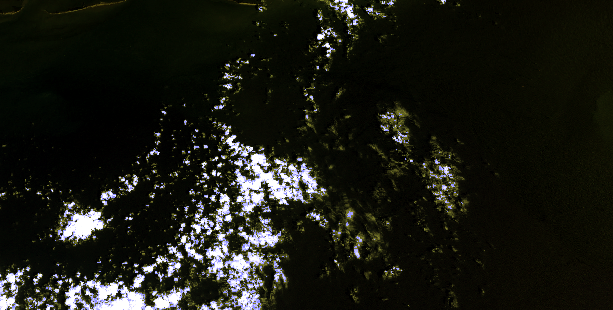|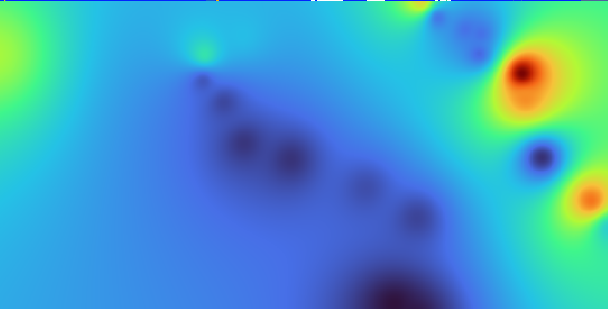

In [3]:
data_path = "/content/drive/MyDrive/2007-05-08.csv"
data = pd.read_csv(data_path)
data

,B1,B2,B3,B4,B5,B7,CHLA,QA,B6
0,9769.0,10616.0,10216.0,8987.0,8405.0,8021.0,9.877915,32.0,42154.0
1,9834.0,10748.0,10109.0,8987.0,8488.0,8140.0,9.877915,32.0,42154.0
2,9964.0,10616.0,10323.0,8987.0,8405.0,8258.0,9.877915,32.0,42154.0
3,9834.0,10748.0,10215.0,8987.0,8488.0,8258.0,9.872737,32.0,42154.0
4,9834.0,10616.0,10323.0,9114.0,8488.0,8258.0,9.872737,32.0,42154.0
...,...,...,...,...,...,...,...,...,...
5750505,10251.0,10452.0,10403.0,10344.0,10058.0,9895.0,7.673080,32.0,43664.0
5750506,9930.0,9925.0,9663.0,9848.0,9560.0,9190.0,7.673080,0.0,43664.0
5750507,10124.0,10320.0,10192.0,10096.0,10141.0,9778.0,7.677982,32.0,43664.0
5750508,10251.0,10320.0,10298.0,10344.0,10224.0,10013.0,7.677982,0.0,43664.0


### **About the data**
This dataframe is created at:
..

- B1, B2, ..., B7: Landsat 5 image px value
- QA: Quality A. with cloud data (based on FMask)
- Chla: Chla data based on interpolated data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5750510 entries, 0 to 5750509
Data columns (total 9 columns):
 #   Column  Dtype  
---  ------  -----  
 0   B1      float64
 1   B2      float64
 2   B3      float64
 3   B4      float64
 4   B5      float64
 5   B7      float64
 6   CHLA    float64
 7   QA      float64
 8   B6      float64
dtypes: float64(9)
memory usage: 394.9 MB


In [5]:
data.describe()

,B1,B2,B3,B4,B5,B7,CHLA,QA,B6
count,5.750510e+06,5.750510e+06,5.750510e+06,5.750510e+06,5.750510e+06,5.750510e+06,5.750510e+06,5.750510e+06,5.750510e+06
mean,1.376191e+04,1.178986e+04,1.170377e+04,1.117077e+04,1.153356e+04,1.014421e+04,5.699801e+00,3.003980e+01,4.243406e+04
std,1.359434e+04,5.849147e+03,7.749945e+03,6.160353e+03,9.123692e+03,3.660382e+03,2.997658e+00,9.457916e+00,1.126782e+03
min,7.726000e+03,7.802000e+03,7.429000e+03,6.461000e+03,7.066000e+03,6.958000e+03,3.400940e-01,0.000000e+00,3.708200e+04
25%,9.550000e+03,9.927000e+03,9.360000e+03,9.104000e+03,8.739000e+03,8.609000e+03,3.604132e+00,3.200000e+01,4.219900e+04
50%,9.762000e+03,1.007600e+04,9.674000e+03,9.478000e+03,9.233000e+03,8.964000e+03,5.184097e+00,3.200000e+01,4.287400e+04
75%,1.025300e+04,1.059300e+04,1.010200e+04,9.859000e+03,9.730000e+03,9.429000e+03,6.785308e+00,3.200000e+01,4.316500e+04
max,6.553500e+04,6.553500e+04,6.553500e+04,6.553500e+04,6.553500e+04,3.363000e+04,2.324801e+01,4.000000e+01,4.808100e+04


In [6]:
data['CHLA'].value_counts()

,count
CHLA,
2.864981,33
5.415605,27
10.000580,27
2.488682,27
3.212587,27
...,...
1.616483,6
1.582498,6
1.561317,6


In [7]:
data.isnull().sum()
data = data.dropna()


In [8]:
s = setup(data, target = 'CHLA', session_id = 123, use_gpu = True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Description,Value
0,Session id,123
1,Target,CHLA
2,Target type,Regression
3,Original data shape,"(5750510, 9)"
4,Transformed data shape,"(5750510, 9)"
5,Transformed train set shape,"(4025356, 9)"
6,Transformed test set shape,"(1725154, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

In [9]:
# dt_model = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3090,0.6873,0.8291,0.9234,0.1131,0.0630
1,0.3104,0.6904,0.8309,0.9229,0.1143,0.0633
2,0.3118,0.7051,0.8397,0.9211,0.1144,0.0634
3,0.3111,0.6910,0.8312,0.9231,0.1139,0.0633
4,0.3082,0.6733,0.8205,0.9250,0.1130,0.0625
5,0.3100,0.6907,0.8311,0.9232,0.1135,0.0632
6,0.3107,0.6984,0.8357,0.9224,0.1138,0.0628
7,0.3103,0.6849,0.8276,0.9238,0.1133,0.0631
8,0.3132,0.7023,0.8380,0.9220,0.1146,0.0636


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [10]:
best = s.compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.1462,0.1423,0.3771,0.9575,0.0457,0.0206,96.9830
et,Extra Trees Regressor,0.1856,0.1932,0.4395,0.9423,0.0531,0.0263,48.3810
xgboost,Extreme Gradient Boosting,0.2776,0.2650,0.5147,0.9208,0.0625,0.0396,0.5330
dt,Decision Tree Regressor,0.1761,0.2756,0.5249,0.9177,0.0630,0.0247,2.0100
lightgbm,Light Gradient Boosting Machine,0.3461,0.3498,0.5914,0.8955,0.0718,0.0494,2.2470
catboost,CatBoost Regressor,0.3653,0.4023,0.6342,0.8799,0.0768,0.0521,5.3280
gbr,Gradient Boosting Regressor,0.5490,0.7374,0.8587,0.7798,0.1038,0.0795,26.5250
knn,K Neighbors Regressor,0.5325,0.9199,0.9591,0.7253,0.1158,0.0758,1.8100
ada,AdaBoost Regressor,1.1728,1.9202,1.3854,0.4266,0.1707,0.1767,11.0630
lasso,Lasso Regression,1.5252,3.2534,1.8037,0.0284,0.2128,0.2172,0.3610


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

# Possiveis melhorias:

## preprocess
- fix_imbalance (para a variável alvo)
- remove_outliers

## feature selection
Feature Selection
Feature Importance is a process used to select features in the dataset that contribute the most in predicting the target variable. Working with selected features instead of all the features reduces the risk of over-fitting, improves accuracy, and decreases the training time. In PyCaret, this can be achieved using feature_selection parameter.

PARAMETERS
feature_selection: bool, default = False
When set to True, a subset of features is selected based on a feature importance score determined by feature_selection_estimator.

feature_selection_method: str, default = 'classic'

Algorithm for feature selection. Choose from:

'univariate': Uses sklearn's SelectKBest.

'classic': Uses sklearn's SelectFromModel.

'sequential': Uses sklearn's SequentialFeatureSelector.

feature_selection_estimator: str or sklearn estimator, default = 'lightgbm'

Classifier used to determine the feature importance. The estimator should have a feature_importances_ or coef_ attribute after fitting. If None, it uses LGBClassifier. This parameter is ignored when feature_selection_method=univariate.

n_features_to_select: int or float, default = 0.2

The maximum number of features to select with feature_selection. If <1, it's the fraction of starting features. Note that this parameter doesn't take features in ignore_features or keep_features into account when counting.

In [ ]:

s.evaluate_model(best)
